In [15]:
import pandas as pd

In [18]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vez/data.csv")

In [19]:
d

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
data=d

In [27]:
X = data['Sentence']
Y = pd.get_dummies(data['Sentiment'])

<Axes: >

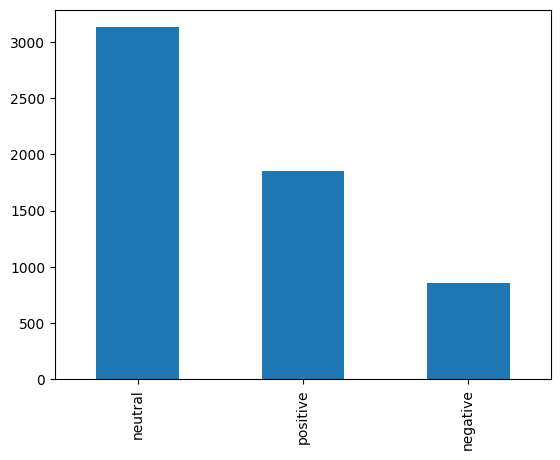

In [26]:
data['Sentiment'].value_counts().plot.bar()

In [28]:
Y

,negative,neutral,positive
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
5837,1,0,0
5838,0,1,0
5839,0,1,0
5840,0,1,0


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
num=3

In [31]:
data['num_words'] = data['Sentence'].apply(lambda x: len(x.split(" ")))

In [32]:
data

,Sentence,Sentiment,num_words
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,17
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16
5840,"In the building and home improvement trade , s...",neutral,18


<Axes: ylabel='Frequency'>

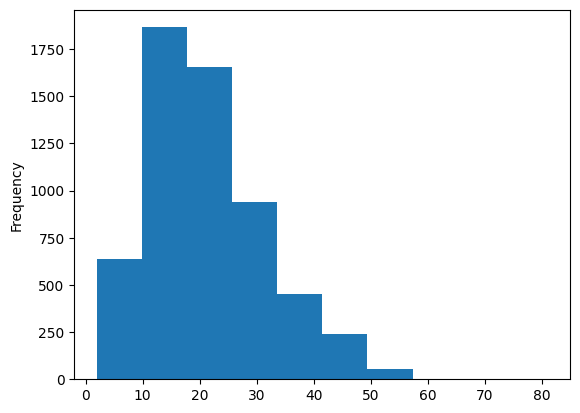

In [33]:
 data['num_words'].plot.hist()

In [36]:
max_tokens=17

In [37]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [39]:
len_tokens = [len(token_list) for token_list in X_train]

(array([1250., 1080.,  970.,  692.,  405.,  197.,   46.,   19.,   11.,
           3.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

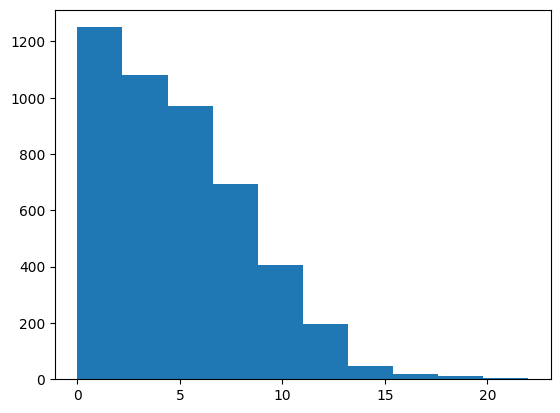

In [40]:
plt.hist(len_tokens)

In [42]:
maxlen=13

In [43]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [44]:
X_train.shape, X_test.shape

((4673, 13), (1169, 13))

In [45]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
num_classes=3

In [48]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [49]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [50]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
59/59 [==============================] - 9s 25ms/step - loss: 0.9984 - precision: 0.5850 - recall: 0.3103 - val_loss: 0.9536 - val_precision: 0.5904 - val_recall: 0.4888
Epoch 2/10
59/59 [==============================] - 1s 25ms/step - loss: 0.9349 - precision: 0.6440 - recall: 0.4342 - val_loss: 0.9257 - val_precision: 0.6605 - val_recall: 0.3807
Epoch 3/10
59/59 [==============================] - 1s 24ms/step - loss: 0.9125 - precision: 0.6774 - recall: 0.3892 - val_loss: 0.9157 - val_precision: 0.6752 - val_recall: 0.3647
Epoch 4/10
59/59 [==============================] - 2s 27ms/step - loss: 0.9036 - precision: 0.6855 - recall: 0.3895 - val_loss: 0.9217 - val_precision: 0.7053 - val_recall: 0.3123
Epoch 5/10
59/59 [==============================] - 2s 35ms/step - loss: 0.8951 - precision: 0.6692 - recall: 0.4433 - val_loss: 0.9097 - val_precision: 0.6835 - val_recall: 0.3765
Epoch 6/10
59/59 [==============================] - 1s 14ms/step - loss: 0.8914 - precision: 0.

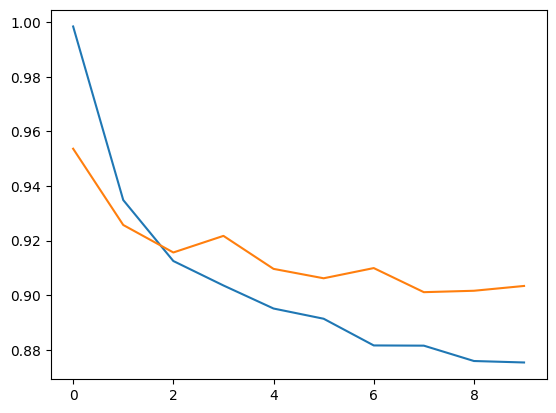

In [51]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [53]:
preds = model.predict(X_test)

37/37 [==============================] - 0s 7ms/step


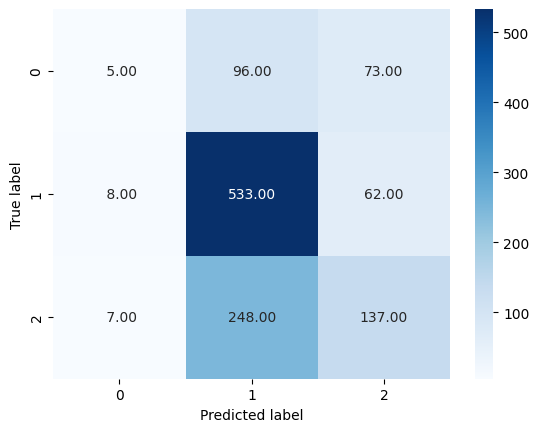

In [55]:
confmat = confusion_matrix(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1))
sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [56]:
 print(classification_report(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05       174
           1       0.61      0.88      0.72       603
           2       0.50      0.35      0.41       392

    accuracy                           0.58      1169
   macro avg       0.45      0.42      0.39      1169
weighted avg       0.52      0.58      0.52      1169

